# Locality Preserving Projections in Python

``lpproj`` is a Python implementation of Locality Preserving Projections, built to be compatible with scikit-learn. It can be installed with pip; e.g.

```
pip install lpproj
```

For more information, see http://github.com/jakevdp/lpproj

This notebook contains a very short example showing the use of the code.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## The Data

We'll use scikit-learn and create some blobs in 500 dimensions

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, n_features=300, centers=4,
                  cluster_std=8, random_state=42)

## Random Projections

If we select a few random projections of the data, we can see that the clusters overlap significantly along any "line-of-sight" into the high-dimensional data:

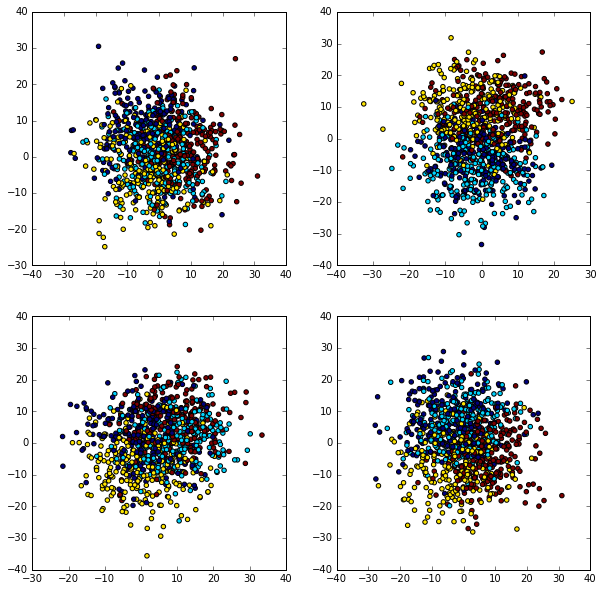

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
rand = np.random.RandomState(42)

for axi in ax.flat:
    axi.scatter(X[:, rand.randint(X.shape[1])],
                X[:, rand.randint(X.shape[1])], c=y);

## Locality Preserving Projection

We can find a projection that preserves the locality of the points using the ``LocalityPreservingProjection`` estimator; here we'll project the data into two dimensions:

In [4]:
from lpproj import LocalityPreservingProjection
lpp = LocalityPreservingProjection(n_components=2)

X_2D = lpp.fit_transform(X)

Plotting this projection, we confirm that it has kept nearby points together, as represented by the distinct clusters visible in the projection:

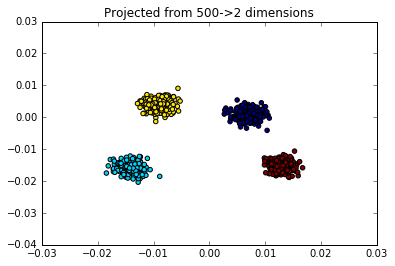

In [5]:
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y)

plt.title("Projected from 500->2 dimensions");

For more information, see the [Locality Preserving Projection website](http://www.cad.zju.edu.cn/home/xiaofeihe/LPP.html)